In [3]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib
import glob
from sklearn import cluster

In [4]:
videoDF = pd.read_csv('../raw_data/youtube_faces_with_keypoints_full.csv')
videoDF.head(15)

,videoID,personName,imageHeight,imageWidth,videoDuration,averageFaceSize,numVideosForPerson
0,Alison_Lohman_0,Alison_Lohman,228.0,213.0,240.0,90.150000,6.0
1,Alison_Lohman_1,Alison_Lohman,248.0,201.0,79.0,108.417722,6.0
2,Alison_Lohman_2,Alison_Lohman,335.0,308.0,136.0,122.161765,6.0
3,Alison_Lohman_3,Alison_Lohman,151.0,110.0,53.0,58.000000,6.0
4,Alison_Lohman_4,Alison_Lohman,236.0,228.0,147.0,91.680272,6.0
5,Alison_Lohman_5,Alison_Lohman,227.0,179.0,68.0,105.647059,6.0
6,Kevin_Spacey_0,Kevin_Spacey,196.0,264.0,91.0,99.912088,6.0
7,Kevin_Spacey_1,Kevin_Spacey,260.0,217.0,59.0,120.186441,6.0
8,Kevin_Spacey_2,Kevin_Spacey,186.0,175.0,71.0,86.746479,6.0
9,Kevin_Spacey_3,Kevin_Spacey,100.0,89.0,99.0,44.636364,6.0


In [5]:
npzFilesFullPath = glob.glob('../raw_data/*.npz')
videoIDs = [x.split('/')[-1].split('.')[0] for x in npzFilesFullPath]
fullPaths = {}
for videoID, fullPath in zip(videoIDs, npzFilesFullPath):
    fullPaths[videoID] = fullPath

# remove from the large csv file all videos that weren't uploaded yet
# videoDF = videoDF.loc[videoDF.loc[:,'videoID'].isin(fullPaths.keys()),:].reset_index(drop=True)
print('Number of Videos is %d' %(videoDF.shape[0]))
print('Number of Unique Individuals is %d' %(len(videoDF['personName'].unique())))

Number of Videos is 2194
Number of Unique Individuals is 828


In [6]:
fullPaths

{'Pascal_Lamy_4': '../raw_data/Pascal_Lamy_4.npz',
 'Pat_Riley_5': '../raw_data/Pat_Riley_5.npz',
 'Pascal_Lamy_5': '../raw_data/Pascal_Lamy_5.npz',
 'Pat_Riley_2': '../raw_data/Pat_Riley_2.npz',
 'Pat_Riley_0': '../raw_data/Pat_Riley_0.npz'}

In [7]:
videoDF = videoDF[videoDF['personName']=='Pat_Riley']
videoDF

,videoID,personName,imageHeight,imageWidth,videoDuration,averageFaceSize,numVideosForPerson
1110,Pat_Riley_0,Pat_Riley,331.0,287.0,78.0,153.076923,3.0
1111,Pat_Riley_2,Pat_Riley,360.0,367.0,215.0,199.697674,3.0
1112,Pat_Riley_5,Pat_Riley,349.0,297.0,240.0,171.062500,3.0


In [8]:
t = ['Pat_Riley', 'Pascal_Lamy']

In [9]:
videoDF[videoDF['personName']=='Pat_Riley']

,videoID,personName,imageHeight,imageWidth,videoDuration,averageFaceSize,numVideosForPerson
1110,Pat_Riley_0,Pat_Riley,331.0,287.0,78.0,153.076923,3.0
1111,Pat_Riley_2,Pat_Riley,360.0,367.0,215.0,199.697674,3.0
1112,Pat_Riley_5,Pat_Riley,349.0,297.0,240.0,171.062500,3.0


In [13]:
videoDF[videoDF['personName'].apply(lambda l: l in t)]

,videoID,personName,imageHeight,imageWidth,videoDuration,averageFaceSize,numVideosForPerson
1110,Pat_Riley_0,Pat_Riley,331.0,287.0,78.0,153.076923,3.0
1111,Pat_Riley_2,Pat_Riley,360.0,367.0,215.0,199.697674,3.0
1112,Pat_Riley_5,Pat_Riley,349.0,297.0,240.0,171.062500,3.0


In [11]:
videoDF[videoDF['personName']==t]

ValueError: ('Lengths must match to compare', (3,), (2,))

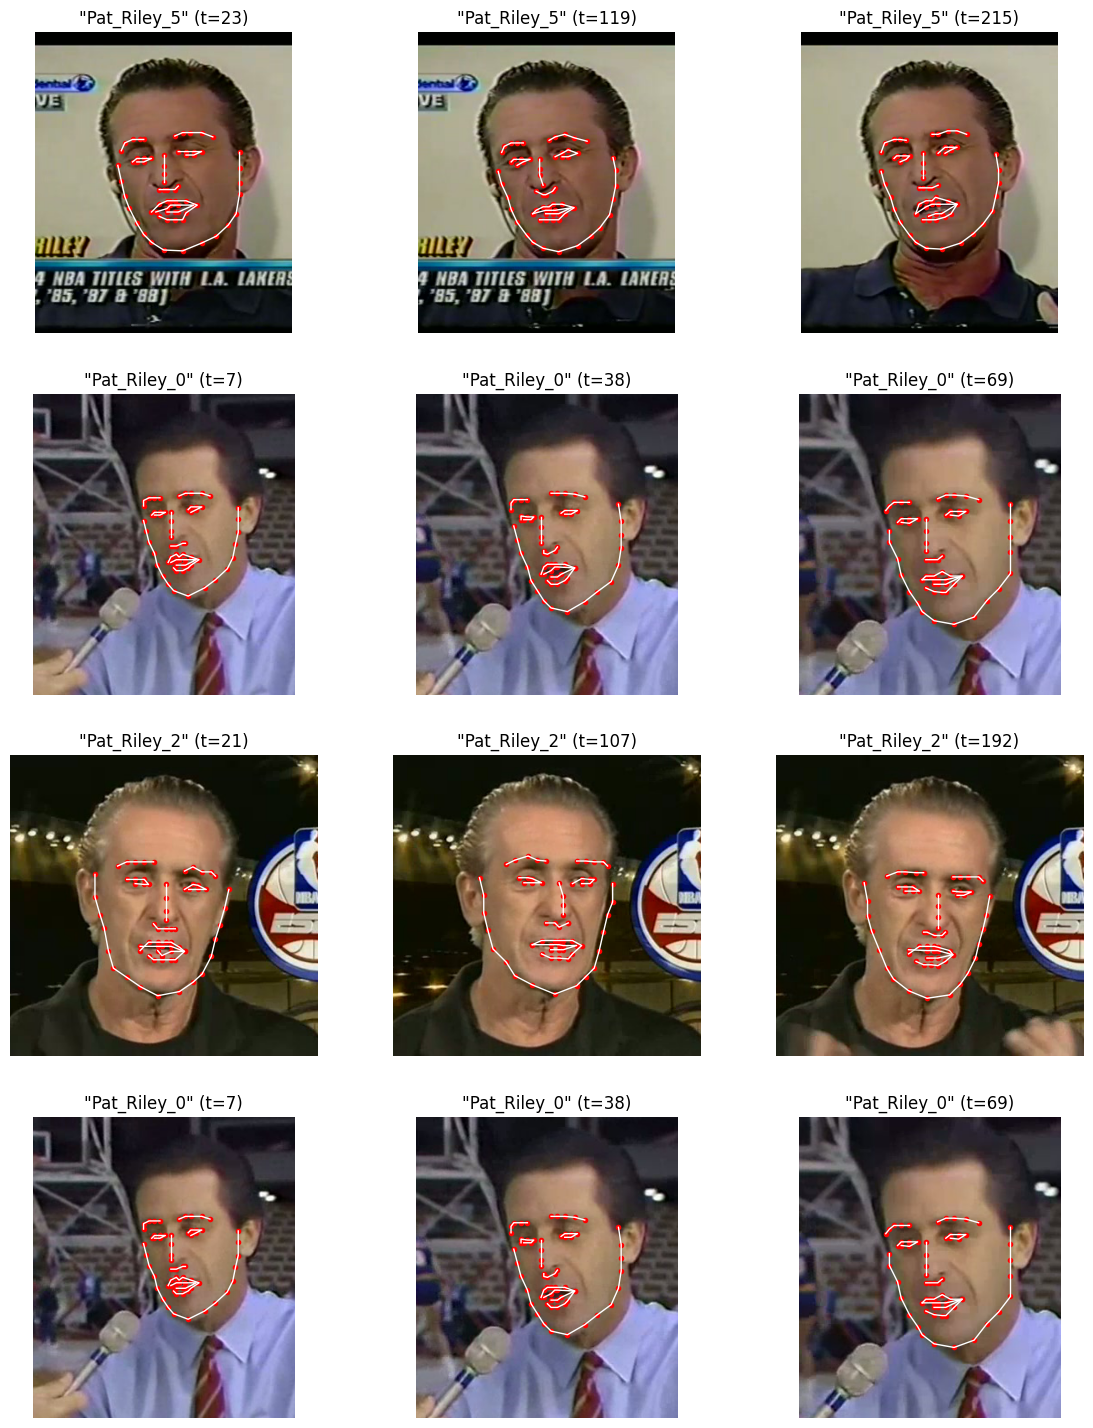

In [15]:
np.random.seed(3)
numVideos = 4
framesToShowFromVideo = np.array([0.1,0.5,0.9])
numFramesPerVideo = len(framesToShowFromVideo)

# define which points need to be connected with a line
jawPoints          = [ 0,17]
rigthEyebrowPoints = [17,22]
leftEyebrowPoints  = [22,27]
noseRidgePoints    = [27,31]
noseBasePoints     = [31,36]
rightEyePoints     = [36,42]
leftEyePoints      = [42,48]
outerMouthPoints   = [48,60]
innerMouthPoints   = [60,68]

listOfAllConnectedPoints = [jawPoints,rigthEyebrowPoints,leftEyebrowPoints,
                            noseRidgePoints,noseBasePoints,
                            rightEyePoints,leftEyePoints,outerMouthPoints,innerMouthPoints]

# select a random subset of 'numVideos' from the available videos
randVideoIDs = videoDF.loc[np.random.choice(videoDF.index,size=numVideos,replace=True),'videoID']

fig, axArray = plt.subplots(nrows=numVideos,ncols=numFramesPerVideo,figsize=(14,18))
for i, videoID in enumerate(randVideoIDs):
    # load video
    videoFile = np.load(fullPaths[videoID])
    colorImages = videoFile['colorImages']
    boundingBox = videoFile['boundingBox']
    landmarks2D = videoFile['landmarks2D']
    landmarks3D = videoFile['landmarks3D']
    
    # select frames and show their content
    selectedFrames = (framesToShowFromVideo*(colorImages.shape[3]-1)).astype(int)
    for j, frameInd in enumerate(selectedFrames):
        axArray[i][j].imshow(colorImages[:,:,:,frameInd])
        axArray[i][j].scatter(x=landmarks2D[:,0,frameInd],y=landmarks2D[:,1,frameInd],s=9,c='r')
        for conPts in listOfAllConnectedPoints:
            xPts = landmarks2D[conPts[0]:conPts[-1],0,frameInd]
            yPts = landmarks2D[conPts[0]:conPts[-1],1,frameInd]
            axArray[i][j].plot(xPts,yPts,c='w',lw=1)
        axArray[i][j].set_title('"%s" (t=%d)' %(videoID,frameInd), fontsize=12)
        axArray[i][j].set_axis_off()

In [23]:
frameInd

69

In [26]:
x_points = landmarks2D[0:17,0, 69]
y_points = landmarks2D[0:17,1, 69]
y_points

array([150., 163., 181., 199., 217., 230., 239., 249., 253., 245., 227.,
       214., 197., 174., 157., 139., 121.])

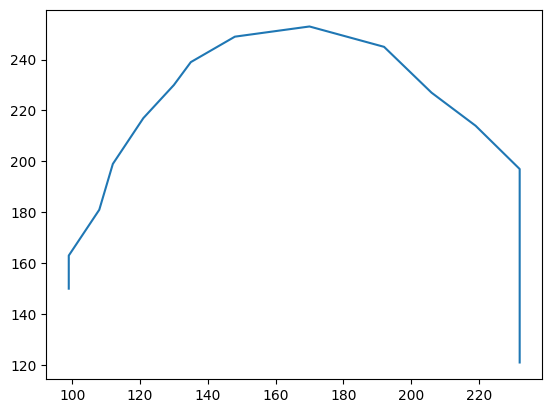

In [31]:
plt.plot(x_points,y_points)

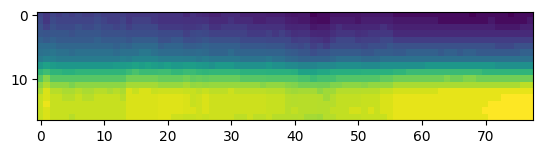

In [24]:
plt.imshow(landmarks2D[0:17,0])